In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [16]:
# Load Titanic dataset 
df = pd.read_csv('./breast-cancer-wisconsin.csv')

,Sample,F1,F2,F3,F4,F5,F6,F7,F8,F9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [17]:

print(df[df.isna().any(axis=1)]) # shows NaN values in data frame if it exists
df.info()

Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Sample  699 non-null    int64 
 1   F1      699 non-null    int64 
 2   F2      699 non-null    int64 
 3   F3      699 non-null    int64 
 4   F4      699 non-null    int64 
 5   F5      699 non-null    int64 
 6   F6      699 non-null    object
 7   F7      699 non-null    int64 
 8   F8      699 non-null    int64 
 9   F9      699 non-null    int64 
 10  Class   699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [18]:
df_num= df.select_dtypes(exclude='object')
df_obj= df.select_dtypes(include='object')
df_num.info()
df_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sample  699 non-null    int64
 1   F1      699 non-null    int64
 2   F2      699 non-null    int64
 3   F3      699 non-null    int64
 4   F4      699 non-null    int64
 5   F5      699 non-null    int64
 6   F7      699 non-null    int64
 7   F8      699 non-null    int64
 8   F9      699 non-null    int64
 9   Class   699 non-null    int64
dtypes: int64(10)
memory usage: 54.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   F6      699 non-null    object
dtypes: object(1)
memory usage: 5.6+ KB


Class
False    683
True      16
Name: count, dtype: int64
Class
False    97.711016
True      2.288984
Name: count, dtype: float64


,F6_10,F6_2,F6_3,F6_4,F6_5,F6_6,F6_7,F6_8,F6_9,Class
0,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


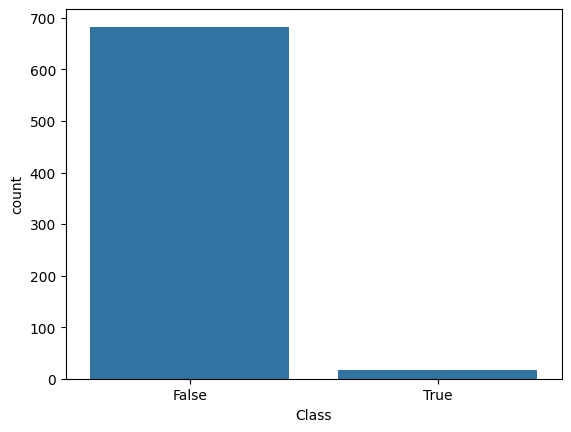

In [22]:
df_obj= pd.get_dummies(df_obj, drop_first=True)
df_obj = df_obj.rename(columns={'F6_?': 'Class'})

print(df_obj['Class'].value_counts())
print( (df_obj['Class'].value_counts()/ df_obj['Class'].value_counts().sum()) * 100)
sns.countplot(data=df_obj, x='Class')
df_obj.head()

In [24]:
attr = df_obj.drop('Class', axis=1)
target = df_obj['Class']

# Split the data into training and testing sets
attr_train, attr_test, target_train, target_test = train_test_split(attr, target, test_size=0.3, random_state=7)

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=3,max_leaf_nodes=5)

In [26]:
model.fit(attr_train,target_train)
target_pred = model.predict(attr_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"\n Accuracy: {accuracy_score(target_test,target_pred)}  ")
print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred))


 Accuracy: 0.9761904761904762  

 Confusion Matrix:
[[205   0]
 [  5   0]]

 Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       205
        True       0.00      0.00      0.00         5

    accuracy                           0.98       210
   macro avg       0.49      0.50      0.49       210
weighted avg       0.95      0.98      0.96       210



/home/bc/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bc/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/bc/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50,30), dpi=250)
plot_tree(model,fontsize=20,filled=True,feature_names=attr.columns);

In [ ]:
# pip install c45-decision-tree

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from C45 import C45Classifier

In [ ]:
# Initialize the classifier (replace with C45Classifier if available)
# clf = DecisionTreeClassifier(criterion='entropy')  # C4.5 uses information gain (entropy)
clf=C45Classifier()
# Train the classifier
clf.fit(attr_train,target_train)
target_pred2 = clf.predict(attr_test)
print(f"\n Accuracy: {accuracy_score(target_test,target_pred2)}  ")

print(f"\n Confusion Matrix:") 
print(confusion_matrix(target_test,target_pred2))
print(f"\n Classification Report:")
print(classification_report(target_test,target_pred2))
